In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.style.use('seaborn')
import seaborn as sns

In [5]:
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
from tsfresh.utilities.dataframe_functions import impute
from sklearn.ensemble import AdaBoostRegressor

# Fix needed to pandas datareader
pd.core.common.is_list_like = pd.api.types.is_list_like
# pip install pandas_datareader
import pandas_datareader.data as web
import datetime

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

## 谷歌股票数据

In [6]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2017, 1, 1)

x = web.DataReader("F", "iex", start, end)
x.head()

,open,high,low,close,volume
date,,,,,
2016-01-04,11.2637,11.3693,11.1663,11.3449,38618524
2016-01-05,11.3449,11.3693,10.9714,11.1419,50267536
2016-01-06,11.0120,11.0120,10.5978,10.6465,61285453
2016-01-07,10.4760,10.5897,10.2324,10.3136,57846688
2016-01-08,10.5978,10.6384,10.1511,10.1836,46199413


In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 5 columns):
open      252 non-null float64
high      252 non-null float64
low       252 non-null float64
close     252 non-null float64
volume    252 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8+ KB


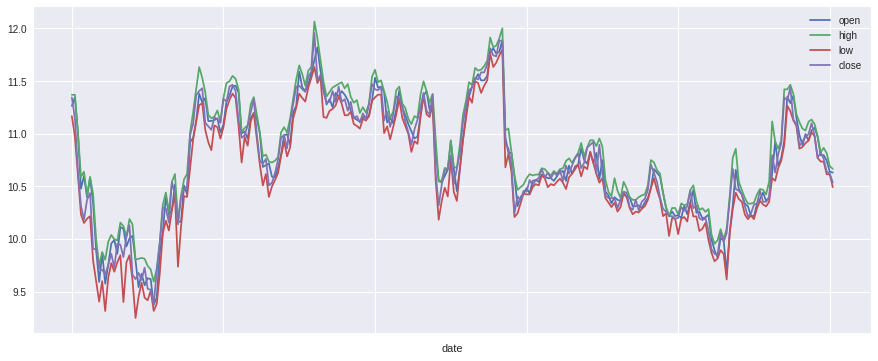

In [10]:
x.drop("volume", axis=1).plot(figsize=(15, 6))
plt.show()

## 预测high序列

In [62]:
df_shift, y = make_forecasting_frame(x["high"], kind="price", max_timeshift=20, rolling_direction=1)

In [63]:
print(y[:5])

date
2016-01-05    11.3693
2016-01-06    11.0120
2016-01-07    10.5897
2016-01-08    10.6384
2016-01-11    10.4110
Name: value, dtype: float64


In [64]:
df_shift.head(10)

,time,value,id,kind
4579,2016-01-04,11.3693,2016-01-05,price
4329,2016-01-04,11.3693,2016-01-06,price
4580,2016-01-05,11.3693,2016-01-06,price
4080,2016-01-04,11.3693,2016-01-07,price
4330,2016-01-05,11.3693,2016-01-07,price
4581,2016-01-06,11.0120,2016-01-07,price
3832,2016-01-04,11.3693,2016-01-08,price
4081,2016-01-05,11.3693,2016-01-08,price
4331,2016-01-06,11.0120,2016-01-08,price
4582,2016-01-07,10.5897,2016-01-08,price


In [65]:
df_shift.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830 entries, 4579 to 4829
Data columns (total 4 columns):
time     4830 non-null object
value    4830 non-null float64
id       4830 non-null object
kind     4830 non-null object
dtypes: float64(1), object(3)
memory usage: 188.7+ KB


In [66]:
X = extract_features(df_shift, column_id="id", column_sort="time", column_value="value",
                    impute_function=impute, show_warnings=False)

Feature Extraction: 100%|██████████| 20/20 [00:04<00:00,  4.93it/s]
 'value__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'value__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"'
 'value__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"'
 'value__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"intercept"'
 'value__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"rvalue"'
 'value__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"slope"'
 'value__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"stderr"'
 'value__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"intercept"'
 'value__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"rvalue"'
 'value__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"slope"'
 'value__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"stderr"'
 'value__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"intercept"'
 'value__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"rvalue"'
 'value__agg_linear_trend

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2016-01-05 to 2016-12-30
Columns: 794 entries, value__abs_energy to value__variance_larger_than_standard_deviation
dtypes: float64(794)
memory usage: 1.5+ MB


In [68]:
X.head()

variable,value__abs_energy,value__absolute_sum_of_changes,"value__agg_autocorrelation__f_agg_""mean""__maxlag_40","value__agg_autocorrelation__f_agg_""median""__maxlag_40","value__agg_autocorrelation__f_agg_""var""__maxlag_40","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","value__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,value__symmetry_looking__r_0.9,value__symmetry_looking__r_0.9500000000000001,value__time_reversal_asymmetry_statistic__lag_1,value__time_reversal_asymmetry_statistic__lag_2,value__time_reversal_asymmetry_statistic__lag_3,value__value_count__value_-1,value__value_count__value_0,value__value_count__value_1,value__variance,value__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
2016-01-05,129.260982,0.0000,0.000000,0.000000,0.000000,11.3469,1.0,0.0336,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2016-01-06,258.521965,0.0000,0.000000,0.000000,0.000000,11.3469,1.0,0.0336,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2016-01-07,379.786109,0.3573,-0.625000,-0.625000,0.140625,11.3469,1.0,0.0336,0.0,0.0,...,1.0,1.0,-90.918456,0.000000,0.0,0.0,0.0,0.0,0.028370,0.0
2016-01-08,491.927855,0.7796,-0.612851,-0.783731,0.483380,11.3469,1.0,0.0336,0.0,0.0,...,1.0,1.0,-139.717744,0.000000,0.0,0.0,0.0,0.0,0.103076,0.0
2016-01-11,605.103410,0.8283,-0.558462,-0.804136,0.562145,11.3469,1.0,0.0336,0.0,0.0,...,1.0,1.0,-121.697074,-177.132732,0.0,0.0,0.0,0.0,0.114384,0.0


In [69]:
# drop constant features
# pd.Series.nunique 每个字段的unique数
# apply() 函数即返回括号函数的返回值
# 把unique数目！=1的特征删去
X = X.loc[:, X.apply(pd.Series.nunique) != 1]

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2016-01-05 to 2016-12-30
Columns: 348 entries, value__abs_energy to value__variance
dtypes: float64(348)
memory usage: 684.4+ KB


In [71]:
X.head()

variable,value__abs_energy,value__absolute_sum_of_changes,"value__agg_autocorrelation__f_agg_""mean""__maxlag_40","value__agg_autocorrelation__f_agg_""median""__maxlag_40","value__agg_autocorrelation__f_agg_""var""__maxlag_40","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","value__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","value__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""rvalue""",...,value__symmetry_looking__r_0.7000000000000001,value__symmetry_looking__r_0.75,value__symmetry_looking__r_0.8,value__symmetry_looking__r_0.8500000000000001,value__symmetry_looking__r_0.9,value__symmetry_looking__r_0.9500000000000001,value__time_reversal_asymmetry_statistic__lag_1,value__time_reversal_asymmetry_statistic__lag_2,value__time_reversal_asymmetry_statistic__lag_3,value__variance
id,,,,,,,,,,,,,,,,,,,,,
2016-01-05,129.260982,0.0000,0.000000,0.000000,0.000000,11.3469,1.0,0.0336,11.016805,-0.175552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
2016-01-06,258.521965,0.0000,0.000000,0.000000,0.000000,11.3469,1.0,0.0336,11.016805,-0.175552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
2016-01-07,379.786109,0.3573,-0.625000,-0.625000,0.140625,11.3469,1.0,0.0336,11.016805,-0.175552,...,1.0,1.0,1.0,1.0,1.0,1.0,-90.918456,0.000000,0.0,0.028370
2016-01-08,491.927855,0.7796,-0.612851,-0.783731,0.483380,11.3469,1.0,0.0336,11.016805,-0.175552,...,1.0,1.0,1.0,1.0,1.0,1.0,-139.717744,0.000000,0.0,0.103076
2016-01-11,605.103410,0.8283,-0.558462,-0.804136,0.562145,11.3469,1.0,0.0336,11.016805,-0.175552,...,1.0,1.0,1.0,1.0,1.0,1.0,-121.697074,-177.132732,0.0,0.114384


In [72]:
# Add last value as feature
X["feature_last_value"] = y.shift(1)

In [73]:
# 向右偏移了一位
y.shift(1)

date
2016-01-05        NaN
2016-01-06    11.3693
2016-01-07    11.0120
2016-01-08    10.5897
2016-01-11    10.6384
2016-01-12    10.4110
2016-01-13    10.5897
2016-01-14    10.4273
2016-01-15     9.9969
2016-01-19     9.7451
2016-01-20     9.8750
2016-01-21     9.8019
2016-01-22     9.9725
2016-01-25    10.0375
2016-01-26     9.9969
2016-01-27     9.9847
2016-01-28    10.1551
2016-01-29    10.1215
2016-02-01    10.0208
2016-02-02    10.1887
2016-02-03    10.1383
2016-02-04     9.8026
2016-02-05     9.8110
2016-02-08     9.8194
2016-02-09     9.8110
2016-02-10     9.7439
2016-02-11     9.7103
2016-02-12     9.5928
2016-02-16     9.7187
2016-02-17     9.9705
               ...   
2016-11-17    10.4656
2016-11-18    10.3874
2016-11-21    10.3353
2016-11-22    10.3353
2016-11-23    10.3440
2016-11-25    10.4222
2016-11-28    10.4743
2016-11-29    10.4656
2016-11-30    10.4222
2016-12-01    10.5437
2016-12-02    11.1170
2016-12-05    10.9259
2016-12-06    10.8564
2016-12-07    10.9346
2016-

In [74]:
# Rrop first line
X = X.iloc[1: ,]
y = y.iloc[1:]

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 2016-01-06 to 2016-12-30
Columns: 349 entries, value__abs_energy to feature_last_value
dtypes: float64(349)
memory usage: 683.6+ KB


In [76]:
len(y)

250

## 模型

In [79]:
ada = AdaBoostRegressor(n_estimators=10)
y_pred = [np.NaN] * len(y)

isp = 100  # index of where to start the predictions
assert isp > 0

for i in tqdm(range(isp, len(y))):
    ada.fit(X.iloc[:i], y[:i])
    y_pred[i] = ada.predict(X.iloc[i, :].values.reshape((1, -1)))[0]
    
y_pred = pd.Series(data=y_pred, index=y.index)

100%|██████████| 150/150 [00:08<00:00, 17.75it/s]


In [81]:
# Dataframe of predictions and true values
ys = pd.concat([y_pred, y], axis=1).rename(columns = {0: 'pred', 'value': 'true'})

# Convert index to a datetime
ys.index = pd.to_datetime(ys.index)
ys.head()

,pred,true
date,,
2016-01-06,NaN,11.0120
2016-01-07,NaN,10.5897
2016-01-08,NaN,10.6384
2016-01-11,NaN,10.4110
2016-01-12,NaN,10.5897


In [85]:
len(y_pred)

250

In [86]:
len(y)

250

In [87]:
len(ys)

250

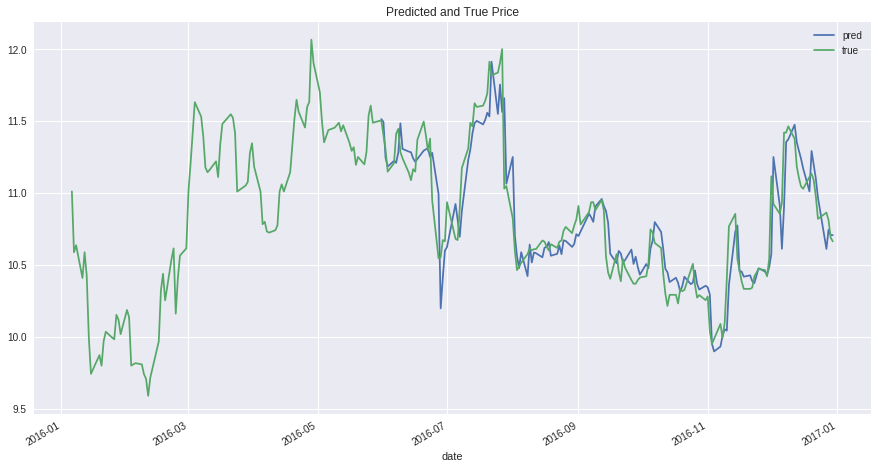

In [82]:
ys.plot(figsize=(15, 8))
plt.title('Predicted and True Price')
plt.show()

##### Looks not too bad. The green curve is the output of the AdaBoost Regressor, the blue curve is the true High value.

##### Now, we will also inspect last value before the prediction as a benchmark tool, denoted by y-1

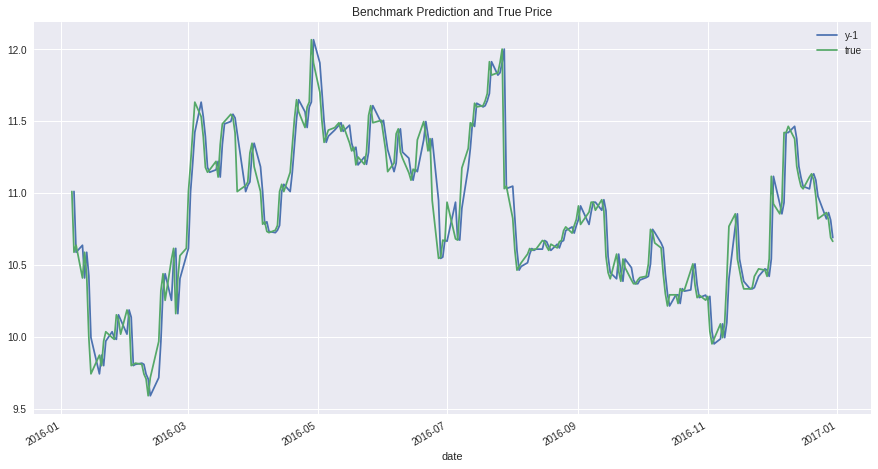

In [88]:
# Create column of previous price
ys['y-1'] = ys['true'].shift(1)
ys[['y-1', 'true']].plot(figsize=(15, 8))
plt.title('Benchmark Prediction and True Price')
plt.show()

In [89]:
print("MAE y-1: \t{}".format(np.mean(np.abs(np.diff(y))[isp-1:])))
print("MAE ada: \t{}".format(np.mean(np.abs(y_pred - y)[isp:])))

MAE y-1: 	0.10199866666666675
MAE ada: 	0.13408488638295726


##### However, we are not yet beating the y-1 benchmark, so we need to invest more time into building dedicated features or use a better model.

##### We can also inspect the relevance of the extracted features

In [90]:
importances = pd.Series(index=X.columns, data=ada.feature_importances_)
importances.sort_values(ascending=False).head(10)

variable
feature_last_value                                                    0.875657
value__change_quantiles__f_agg_"var"__isabs_False__qh_0.4__ql_0.2     0.012539
value__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.4      0.011452
value__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.4     0.009804
value__time_reversal_asymmetry_statistic__lag_2                       0.007622
value__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.0    0.005810
value__kurtosis                                                       0.005271
value__fft_coefficient__coeff_9__attr_"real"                          0.005223
value__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_7__w_10         0.004979
value__skewness                                                       0.004806
dtype: float64

##### So, the minumum value "feature__maximum" during the last 10 values had the highest importance to predict the next value of the High column